# Monetary Economics: Chapter 6

### Preliminaries

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve.model import Model
from pysolve.utils import is_close,round_solution

import matplotlib.pyplot as plt


### Model OPENM3

In [2]:
def create_openm3_model():
    model = Model()

    model.set_var_default(0)
    model.var('BcbN', desc='Bills held by the Central Bank in Country N')
    model.var('BcbS', desc='Bills held by the Central Bank in Country S')
    model.var('BhN', desc='Bills held by households, Country N')
    model.var('BhS', desc='Bills held by households, Country S')
    model.var('BsN', desc='Supply of government bills in Country N')
    model.var('BsS', desc='Supply of government bills in Country S')
    model.var('CN', desc='Consumption, Country N')
    model.var('CS', desc='Consumption, Country S')
    model.var('HhN', desc='Cash held by households, Country N')
    model.var('HhS', desc='Cash held by households, Country S')
    model.var('HsN', desc='Supply of cash in Country N')
    model.var('HsS', desc='Supply of cash in Country S')
    model.var('IMN', desc='Imports, Region N')
    model.var('IMS', desc='Imports, Region S')
    model.var('ORN', desc='Gold holding by Central bank in Country N')
    model.var('ORS', desc='Gold holding by Central bank in Country S')
    model.var('PgN', desc='Price of gold in Country N')
    model.var('PgS', desc='Price of gold in Country S')
    model.var('RN', desc='Interest rate on bills in Country N')
    model.var('RS', desc='Interest rate on bills in Country S')
    model.var('TN', desc='Tax payments, Country N')
    model.var('TS', desc='Tax payments, Country S')
    model.var('VN', desc='Household wealth, Country N')
    model.var('VS', desc='Household wealth, Country S')
    model.var('XN', desc='Exports, Country N')
    model.var('XS', desc='Exports, Country S')
    model.var('XR', desc='Exchange rate (units of currency S for one unit of currency N)')
    model.var('YN', desc='National income, Country N')
    model.var('YS', desc='National income, Country S')
    model.var('YDN', desc='National disposable income, Country N')
    model.var('YDS', desc='National disposable income, Country S')
    
    model.var('alpha1N', desc='Propensity to consume out of income, Country N')
    model.var('alpha1S', desc='Propensity to consume out of income, Country S')

    model.set_param_default(0)
    model.param('alpha10N', desc='Propensity to consume out of income, Country N, exogenous')
    model.param('alpha10S', desc='Propensity to consume out of income, Country S, exogenous')
    model.param('alpha2N', desc='Propensity to consume out of wealth, Country N')
    model.param('alpha2S', desc='Propensity to consume out of wealth, Country S')
    model.param('iotaN', desc='Parameter linking the propensity to consume to the interest rate for Country N')
    model.param('iotaS', desc='Parameter linking the propensity to consume to the interest rate for Country S')
    model.param('lambda0N', desc='Parameter in asset demand function, Country N')
    model.param('lambda0S', desc='Parameter in asset demand function, Country S')
    model.param('lambda1N', desc='Parameter in asset demand function, Country N')
    model.param('lambda1S', desc='Parameter in asset demand function, Country S')
    model.param('lambda2N', desc='Parameter in asset demand function, Country N')
    model.param('lambda2S', desc='Parameter in asset demand function, Country S')
    model.param('muN', desc='Import propensity, Country N')
    model.param('muS', desc='Import propensity, Country S')
    model.param('phiN', desc='Parameter in fiscal policy reaction function, Country N')
    model.param('phiS', desc='Parameter in fiscal policy reaction function, Country S')
    model.param('thetaN', desc='Tax rate in Country N')
    model.param('thetaS', desc='Tax rate in Country S')

    model.param('GN', desc='Government expenditure, Region N')
    model.param('GS', desc='Government expenditure, Region S')
    model.param('Pgbar', desc='Price of gold, set exogenously')
    model.param('XRbar', desc='Exchange rate, set exogenously')

    model.add('YN = CN + GN + XN - IMN')
    model.add('YS = CS + GS + XS - IMS')
    model.add('IMN = muN * YN')
    model.add('IMS = muS * YS')
    model.add('XN = IMS/XR')
    model.add('XS = IMN*XR')
    model.add('YDN = YN - TN + RN(-1)*BhN(-1)')
    model.add('YDS = YS - TS + RS(-1)*BhS(-1)')
    model.add('TN = thetaN * (YN + RN(-1)*BhN(-1))')
    model.add('TS = thetaS * (YS + RS(-1)*BhS(-1))')
    model.add('VN - VN(-1) = YDN - CN')
    model.add('VS - VS(-1) = YDS - CS')
    model.add('CN = alpha1N*YDN + alpha2N*VN(-1)')
    model.add('CS = alpha1S*YDS + alpha2S*VS(-1)')
    model.add('HhN = VN - BhN')
    model.add('HhS = VS - BhS')
    model.add('BhN = VN*(lambda0N + lambda1N*RN - lambda2N*(YDN/VN))')
    model.add('BhS = VS*(lambda0S + lambda1S*RS - lambda2S*(YDS/VS))')
    model.add('BsN - BsN(-1) = (GN + RN(-1)*BsN(-1)) - (TN + RN(-1)*BcbN(-1))')
    model.add('BsS - BsS(-1) = (GS + RS(-1)*BsS(-1)) - (TS + RS(-1)*BcbS(-1))')
    model.add('BcbN = BsN - BhN')
    model.add('BcbS = BsS - BhS')
    model.add('ORN - ORN(-1)= (HsN - HsN(-1) - (BcbN - BcbN(-1)))/PgN')
    model.add('ORS - ORS(-1)= (HsS - HsS(-1) - (BcbS - BcbS(-1)))/PgS')
    model.add('HsN = HhN')
    model.add('HsS = HhS')
    model.add('PgN = Pgbar')
    model.add('PgS = PgN*XR')
    model.add('XR = XRbar')
    model.add('RN = RN(-1) - phiN*((ORN(-1) - ORN(-2))*PgN(-1))/ORN(-1)')
    model.add('RS = RS(-1) - phiS*((ORS(-1) - ORS(-2))*PgS(-1))/ORS(-1)')
    model.add('alpha1N = alpha10N - iotaN*RN(-1)')
    model.add('alpha1S = alpha10S - iotaS*RS(-1)')
    
    return model

openm3_parameters = {'alpha10N': 0.6125,
                     'alpha10S': 0.7125,
                     'alpha2N': 0.4,
                     'alpha2S': 0.3,
                     'iotaN': 0.5,
                     'iotaS': 0.5,
                     'lambda0N': 0.635,
                     'lambda0S': 0.67,
                     'lambda1N': 5,
                     'lambda1S': 6,
                     'lambda2N': 0.01,
                     'lambda2S': 0.07,
                     'muN': 0.18781,
                     'muS': 0.18781,
                     'phiN': 0.005,
                     'phiS': 0.005,
                     'thetaN': 0.2,
                     'thetaS': 0.2}
openm3_exogenous = {'Pgbar': 1,
                    'GN': 20,
                    'GS': 20,
                    'XRbar': 1}
openm3_variables = {'BcbN': 11.622,
                    'BcbS': 11.622,
                    'BhN': 64.865,
                    'BhS': 64.865,
                    'BsN': 76.486,
                    'BsS': 76.486,
                    'ORN': 10,
                    'ORS': 10,
                    'VN': 86.487,
                    'VS': 86.486,
                    'HhN': 86.487 - 64.865,
                    'HhS': 86.486 - 64.865,
                    'HsN': 86.487 - 64.865,
                    'HsS': 86.486 - 64.865,
                    'RN': 0.025,
                    'RS': 0.025,
                    'PgN': 1,
                    'PgS': 1,
                    'XR': 1}

### Scenario: Model OPENM3, increase in propensity to import of country S

In [3]:
muS = create_openm3_model()
muS.set_values(openm3_parameters)
muS.set_values(openm3_exogenous)
muS.set_values(openm3_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(15):
    muS.solve(iterations=100, threshold=1e-6)

# shock the system
muS.set_values({'muS': 0.2})

for _ in range(40):
    muS.solve(iterations=100, threshold=1e-6)


###### Figure 6.16

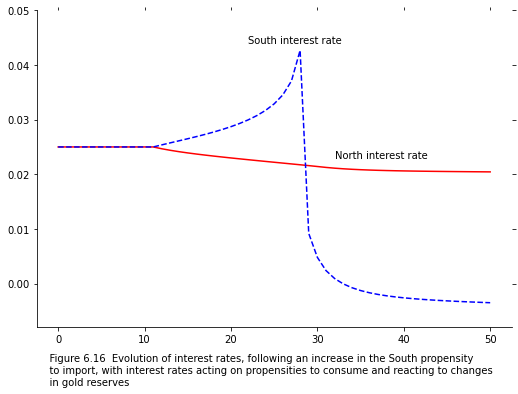

In [4]:
caption = '''
    Figure 6.16  Evolution of interest rates, following an increase in the South propensity
    to import, with interest rates acting on propensities to consume and reacting to changes
    in gold reserves'''
rndata = [s['RN'] for s in muS.solutions[5:]]
rsdata = [s['RS'] for s in muS.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-0.008, 0.05)

axes.plot(rndata, linestyle='-', color='r')
axes.plot(rsdata, linestyle='--', color='b')

# add labels
plt.text(22, 0.044, 'South interest rate')
plt.text(32, 0.023, 'North interest rate')
fig.text(0.1, -.1, caption);

###### Figure 6.17

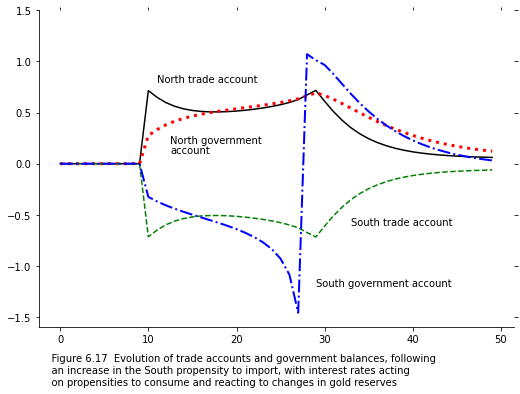

In [5]:
caption = '''
    Figure 6.17  Evolution of trade accounts and government balances, following
    an increase in the South propensity to import, with interest rates acting
    on propensities to consume and reacting to changes in gold reserves'''
tradeNdata = list()
tradeSdata = list()
govtNdata = list()
govtSdata = list()

for i in range(6, len(muS.solutions)):
    s = muS.solutions[i]
    s_1 = muS.solutions[i-1]
    tradeNdata.append(s['XN'] - s['IMN'])
    tradeSdata.append(s['XS'] - s['IMS'])
    govtNdata.append(s['TN'] - (s['GN'] + s['RN']*s_1['BhN']))
    govtSdata.append(s['TS'] - (s['GS'] + s['RS']*s_1['BhS']))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-1.6, 1.5)

axes.plot(tradeNdata, linestyle='-', color='k')
axes.plot(govtNdata, linestyle=':', color='r', linewidth=3)
axes.plot(tradeSdata, linestyle='--', color='g')
axes.plot(govtSdata, linestyle='-.', color='b', linewidth=2)

# add labels
plt.text(11, 0.8, 'North trade account')
plt.text(12.5, 0.2, 'North government')
plt.text(12.5, 0.1, 'account')
plt.text(33, -0.6, 'South trade account')
plt.text(29, -1.2, 'South government account')
fig.text(0.1, -.1, caption);